In [18]:
import pandas as pd
def get_filename(from_symbol, to_symbol, exchange, datetime_interval, download_date):
    return '%s_%s_%s_%s_%s.csv' % (from_symbol, to_symbol, exchange, datetime_interval, download_date)
def read_dataset(filename):
    print('Reading data from %s' % filename)
    df = pd.read_csv(filename)
    df.datetime = pd.to_datetime(df.datetime) # change to datetime
    df = df.set_index('datetime') 
    df = df.sort_index() # sort by datetime
    print(df.shape)
    return df

In [19]:
df_btc = read_dataset(get_filename('BTC', 'USD', 'Coinbase', 'hour', '2017-12-24'))
df_eth = read_dataset(get_filename('ETH', 'USD', 'Coinbase', 'hour', '2017-12-24'))
df_ltc = read_dataset(get_filename('LTC', 'USD', 'Coinbase', 'hour', '2017-12-24'))
df_btc.head()

Reading data from BTC_USD_Coinbase_hour_2017-12-24.csv
(2001, 6)
Reading data from ETH_USD_Coinbase_hour_2017-12-24.csv
(2001, 6)
Reading data from LTC_USD_Coinbase_hour_2017-12-24.csv
(2001, 6)


,low,high,open,close,volumefrom,volumeto
datetime,,,,,,
2017-01-11 00:00:00,6370.02,6445.01,6445.01,6385.02,946.73,6063318.91
2017-01-11 01:00:00,6385.02,6420.25,6385.02,6420.00,381.22,2442908.07
2017-01-11 02:00:00,6410.99,6431.22,6420.00,6429.99,330.78,2123551.88
2017-01-11 03:00:00,6429.99,6461.40,6429.99,6445.00,531.49,3427343.29
2017-01-11 04:00:00,6365.54,6445.00,6445.00,6371.04,670.15,4287059.36


In [20]:
df = pd.DataFrame({'BTC': df_btc.close,
                   'ETH': df_eth.close,
                   'LTC': df_ltc.close})
df.head()

,BTC,ETH,LTC
datetime,,,
2017-01-11 00:00:00,6385.02,303.45,55.31
2017-01-11 01:00:00,6420.00,303.69,55.29
2017-01-11 02:00:00,6429.99,303.83,55.31
2017-01-11 03:00:00,6445.00,303.50,55.40
2017-01-11 04:00:00,6371.04,302.94,55.32


In [21]:
df.describe()

,BTC,ETH,LTC
count,2001.000000,2001.000000,2001.000000
mean,9060.256122,407.263793,106.790100
std,4404.269591,149.480416,89.142241
min,4150.020000,277.810000,48.610000
25%,5751.020000,301.510000,55.580000
50%,7319.950000,330.800000,63.550000
75%,11305.000000,464.390000,100.050000
max,19847.110000,858.900000,378.660000


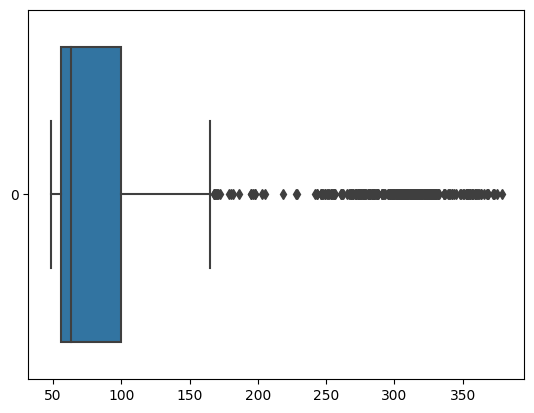

In [22]:
import seaborn as sns
ax = sns.boxplot(data=df['LTC'], orient="h")

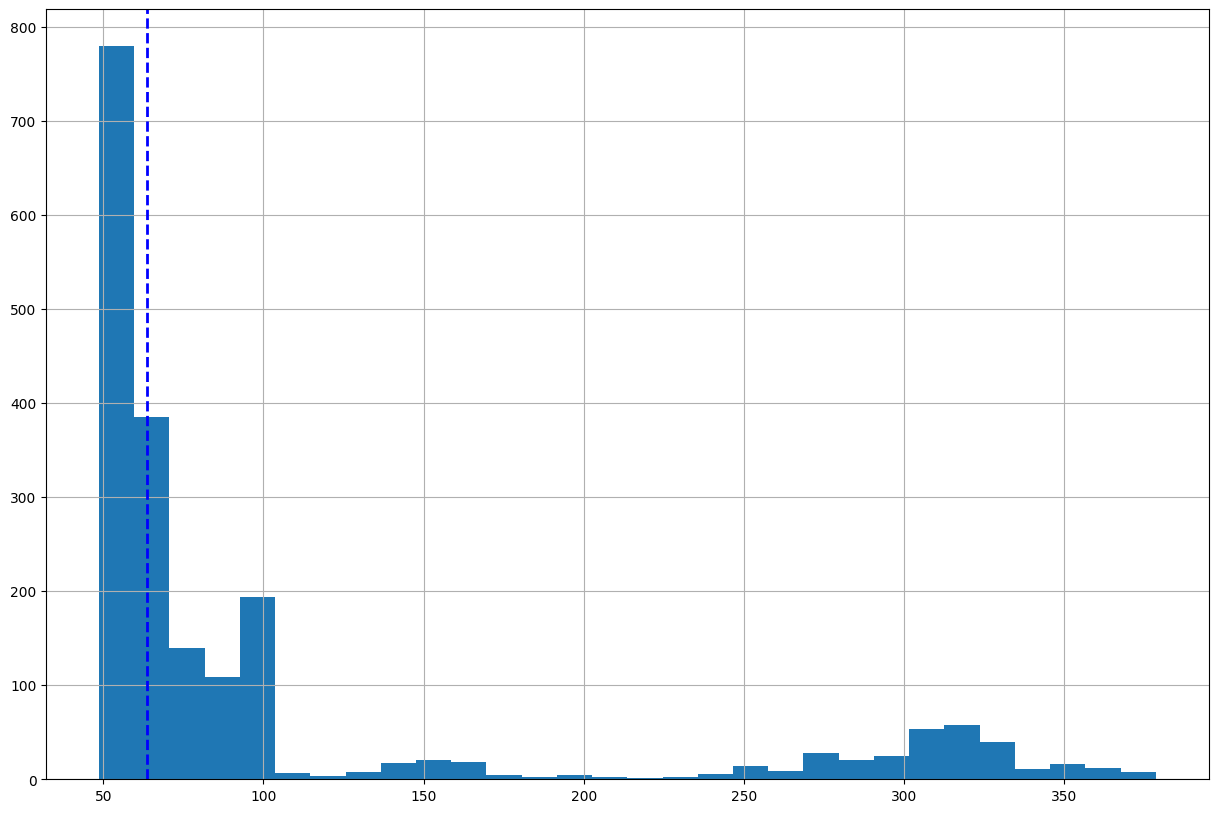

In [23]:
df['LTC'].hist(bins=30, figsize=(15,10)).axvline(df['LTC'].median(), color='b', linestyle='dashed', linewidth=2)

<Axes: xlabel='datetime'>

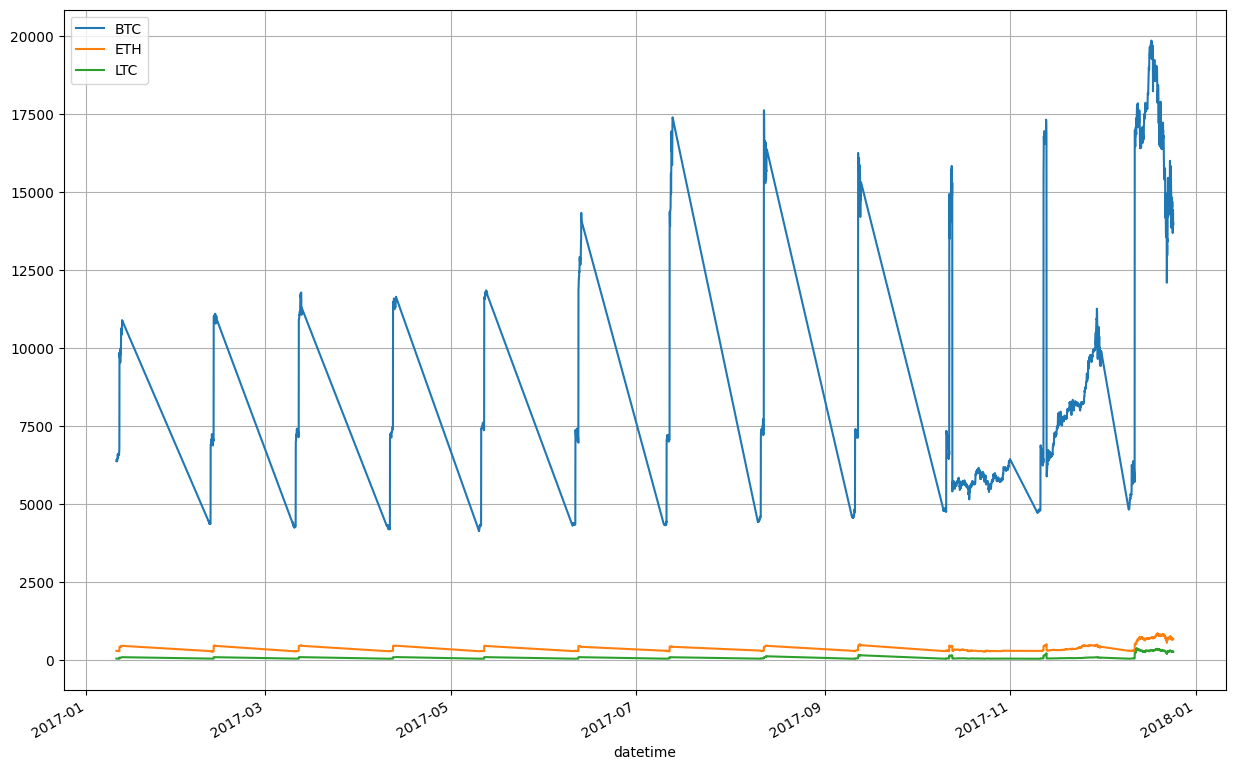

In [24]:
df.plot(grid=True, figsize=(15, 10))

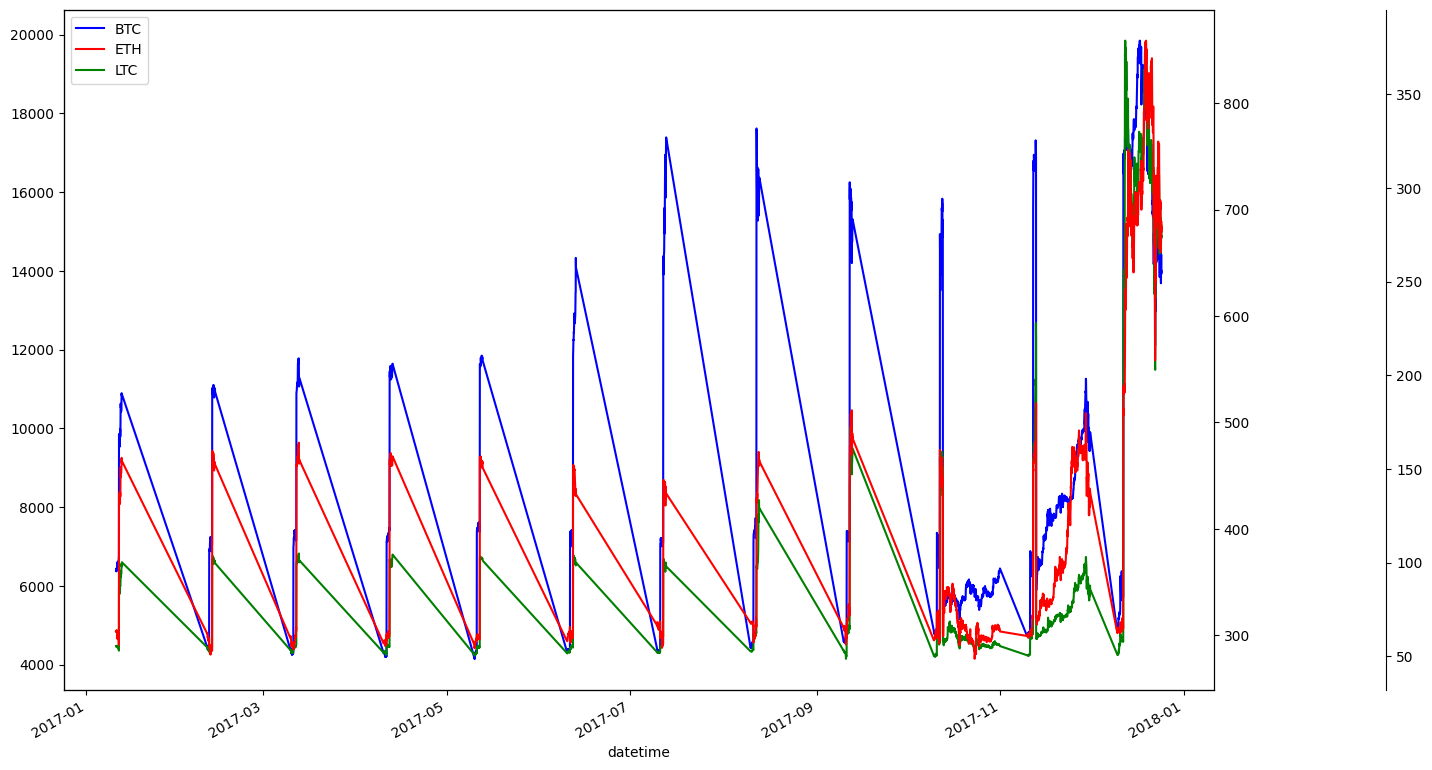

In [25]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
rspine = ax2.spines['right']
rspine.set_position(('axes', 1.15))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.7)
df['BTC'].plot(ax=ax1, style='b-')
df['ETH'].plot(ax=ax1, style='r-', secondary_y=True)
df['LTC'].plot(ax=ax2, style='g-')
# legend
ax2.legend([ax1.get_lines()[0],
            ax1.right_ax.get_lines()[0],
            ax2.get_lines()[0]],
           ['BTC', 'ETH', 'LTC'])

<Axes: >

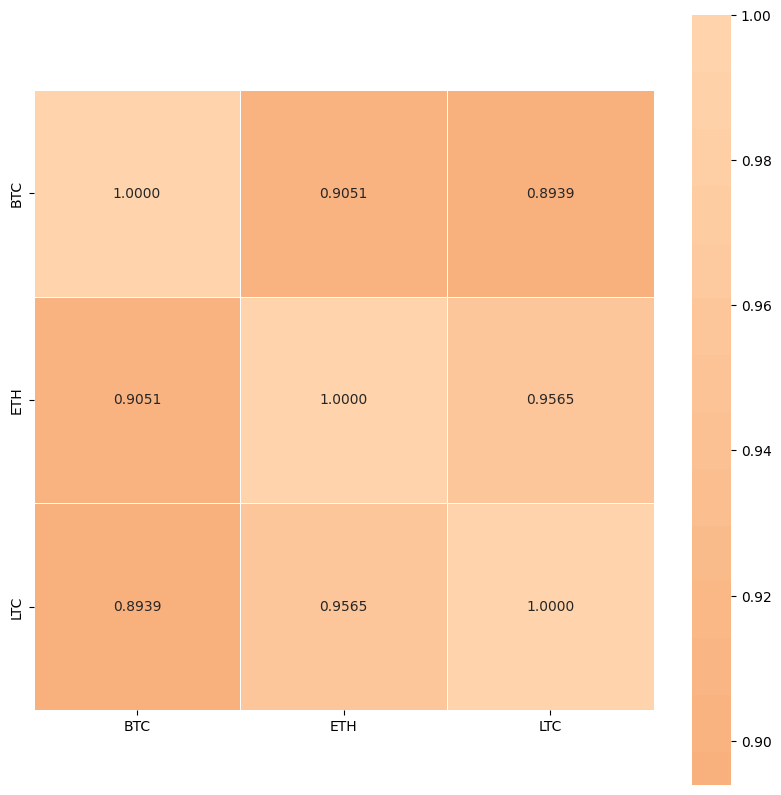

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
# Compute the correlation matrix
corr = df.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', center=0, square=True, linewidths=.5)

In [30]:
df_return = df.apply(lambda x: x / x[0])
df_return.head()

,BTC,ETH,LTC
datetime,,,
2017-01-11 00:00:00,1.000000,1.000000,1.000000
2017-01-11 01:00:00,1.005478,1.000791,0.999638
2017-01-11 02:00:00,1.007043,1.001252,1.000000
2017-01-11 03:00:00,1.009394,1.000165,1.001627
2017-01-11 04:00:00,0.997811,0.998319,1.000181


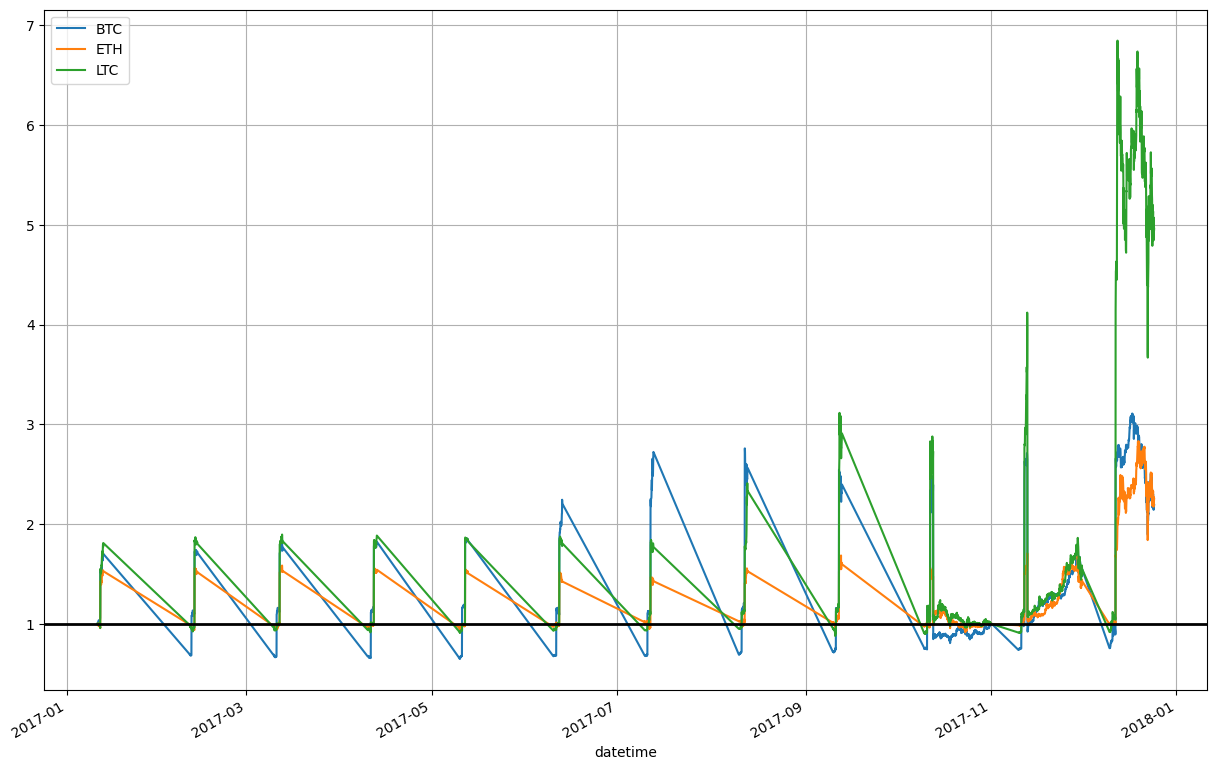

In [31]:
df_return.plot(grid=True, figsize=(15, 10)).axhline(y = 1, color = "black", lw = 2)